#### Os dados, até a data do presente estudo, estão no https://opendatasus.saude.gov.br/dataset/bd-srag-2020
#### O presente arquivo é de terça, 23 de junho. Atenção: a última barra no gráfico por semana é menor, pois a semana é incompleta! Note também que o crescimento é diferente por cidades.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\INFLUD-23-06-2020.csv'
df = pd.read_csv(filename, delimiter=';', 
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

c:\users\fmasa\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (18,59,61,62,63,103,105,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
for k in (18,59,61,62,63,103,105,119,126,128,129,130,132): print (k, df.columns[k])

18 CS_ETINIA
59 DT_VAC_MAE
61 DT_DOSEUNI
62 DT_1_DOSE
63 DT_2_DOSE
103 FLUASU_OUT
105 FLUBLI_OUT
119 CLASSI_OUT
126 PAIS_VGM
128 LO_PS_VGM
129 DT_VGM
130 DT_RT_VGM
132 PAC_COCBO


In [4]:
df.shape

(326193, 134)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326193 entries, 0 to 326192
Columns: 134 entries, DT_NOTIFIC to PAC_DSCBO
dtypes: float64(76), int64(10), object(48)
memory usage: 273.8+ MB


In [6]:
for par in enumerate(df.columns): print (par)

(0, 'DT_NOTIFIC')
(1, 'SEM_NOT')
(2, 'DT_SIN_PRI')
(3, 'SEM_PRI')
(4, 'SG_UF_NOT')
(5, 'ID_REGIONA')
(6, 'CO_REGIONA')
(7, 'ID_MUNICIP')
(8, 'CO_MUN_NOT')
(9, 'ID_UNIDADE')
(10, 'CO_UNI_NOT')
(11, 'CS_SEXO')
(12, 'DT_NASC')
(13, 'NU_IDADE_N')
(14, 'TP_IDADE')
(15, 'COD_IDADE')
(16, 'CS_GESTANT')
(17, 'CS_RACA')
(18, 'CS_ETINIA')
(19, 'CS_ESCOL_N')
(20, 'ID_PAIS')
(21, 'CO_PAIS')
(22, 'SG_UF')
(23, 'ID_RG_RESI')
(24, 'CO_RG_RESI')
(25, 'ID_MN_RESI')
(26, 'CO_MUN_RES')
(27, 'CS_ZONA')
(28, 'SURTO_SG')
(29, 'NOSOCOMIAL')
(30, 'AVE_SUINO')
(31, 'FEBRE')
(32, 'TOSSE')
(33, 'GARGANTA')
(34, 'DISPNEIA')
(35, 'DESC_RESP')
(36, 'SATURACAO')
(37, 'DIARREIA')
(38, 'VOMITO')
(39, 'OUTRO_SIN')
(40, 'OUTRO_DES')
(41, 'PUERPERA')
(42, 'CARDIOPATI')
(43, 'HEMATOLOGI')
(44, 'SIND_DOWN')
(45, 'HEPATICA')
(46, 'ASMA')
(47, 'DIABETES')
(48, 'NEUROLOGIC')
(49, 'PNEUMOPATI')
(50, 'IMUNODEPRE')
(51, 'RENAL')
(52, 'OBESIDADE')
(53, 'OBES_IMC')
(54, 'OUT_MORBI')
(55, 'MORB_DESC')
(56, 'VACINA')
(57, 'DT_UT_DOS

In [7]:
# Tabelas de microdados usam números, faço a correspondência desses números com seus significados
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

In [8]:
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])
df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])
df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['DT_NOTIFIC'].dropna(inplace=True)

In [9]:
df.sample(10)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,IF_PARA3,IF_ADENO,IF_OUTRO,DS_IF_OUT,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
169740,20/05/2020,21,20/05/2020,21,PR,09RS FOZ DO IGUACU,1363.0,FOZ DO IGUACU,410830,HOSPITAL MINISTRO COSTA CAVALCANTI,2591049,F,24/08/1942,77,3,3077,5,Branca,NaN,Ignorado,BRASIL,1,PR,09RS FOZ DO IGUACU,1363.0,FOZ DO IGUACU,410830.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,2.0,25/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,2.0,20/05/2020,26/05/2020,22/05/2020,2,NaN,NaN,NaN,00000000,00000000,NaN,NaN,NaN
132597,13/05/2020,20,04/05/2020,19,RJ,NaN,NaN,RIO DE JANEIRO,330455,SES RJ UPA 24H COPACABANA,6858317,M,18/06/1986,33,3,3033,6,Ignorado,NaN,Ignorado,BRASIL,1,RJ,NaN,NaN,RIO DE JANEIRO,330455.0,NaN,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,2.0,04/05/2020,25/05/2020,13/05/2020,9,NaN,NaN,NaN,00000000,00000000,NaN,NaN,NaN
94105,09/04/2020,15,07/04/2020,15,RJ,NaN,NaN,RIO DE JANEIRO,330455,MS HOSPITAL FEDERAL DO ANDARAI,2269384,F,24/01/1964,56,3,3056,5,Preta,NaN,Ignorado,BRASIL,1,RJ,NaN,NaN,RIO DE JANEIRO,330455.0,1.0,1.0,2.0,2.0,1.0,1.0,9.0,1.0,9.0,1.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,2.0,20/04/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,00000000,00000000,04/05/2020,2,NaN,NaN,NaN,00000000,00000000,NaN,NaN,NaN
171714,15/05/2020,20,13/05/2020,20,RJ,NaN,NaN,RIO DE JANEIRO,330455,SES UPA 24H ILHA DO GOVERNADOR AP 31,6037550,M,01/04/1951,69,3,3069,6,Ignorado,NaN,Ignorado,BRASIL,1,RJ,NaN,NaN,RIO DE JANEIRO,330455.0,NaN,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,5.0,00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13/05/2020,00000000,22/05/2020,9,NaN,NaN,NaN,00000000,00000000,NaN,NaN,NaN
107344,05/05/2020,19,28/04/2020,18,SP,GVE XV BAURU,1340.0,JAU,352530,SANTA CASA DE JAU,2791722,F,06/02/1978,42,3,3042,5,Branca,NaN,Superior,BRASIL,1,SP,GVE XV BAURU,1340.0,JAU,352530.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,1.0,04/05/2020,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1.0,11/05/2020,12/05/2020,07/05/2020,2,NaN,NaN,NaN,00000000,00000000,1.0,NaN,NaN
240173,31/05/2020,23,23/05/2020,21,SP,GVE VII SANTO ANDRE,1332.0,SAO BERNARDO DO CAMPO,354870,HOSPITAL E PRONTO SOCORRO CENTRAL,2069776,M,29/04/1945,75,3,3075,6,Branca,NaN,Ignorado,BRASIL,1,SP,GVE VII SANTO ANDRE,1332.0,SAO BERNARDO DO CAMPO,354870.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,1.0,02/06/2020,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1.0,00000000,08/06/2020,08/06/2020,2,NaN,NaN,NaN,00000000,00000000,1.0,NaN,NaN
127838,12/05/2020,20,08/05/2020,19,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL E MATERNIDADE SANTA MARIA CRUZ AZUL,2078589,F,08/02/1938,82,3,3082,9,Branca,NaN,Fund1,BRASIL,1,SP,GVE VII SANTO ANDRE,1332.0,SANTO ANDRE,354780.0,1.0,9.0,9.0,9.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,1.0,13/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,2.0,03/06/2020,04/06/2020,12/05/2020,9,NaN,NaN,NaN,00000

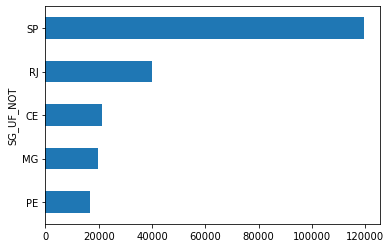

In [10]:
df.groupby('SG_UF_NOT').size().sort_values().tail(5).plot(kind='barh')

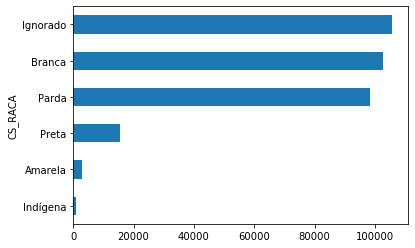

In [11]:
df.groupby('CS_RACA').size().sort_values().plot(kind='barh')

In [12]:
df.groupby('CS_RACA').size().sort_values()

CS_RACA
Indígena       837
Amarela       2868
Preta        15356
Parda        98501
Branca      102870
Ignorado    105761
dtype: int64

In [13]:
df.groupby('CS_ESCOL_N').size().sort_values(ascending=False)

CS_ESCOL_N
Ignorado         207106
Médio             33525
Fund1             28907
Fund2             18903
Superior          16951
Não se aplica     11983
Sem                8818
dtype: int64

In [14]:
df.query('HISTO_VGM == 1')['HISTO_VGM'].value_counts()

1    989
Name: HISTO_VGM, dtype: int64

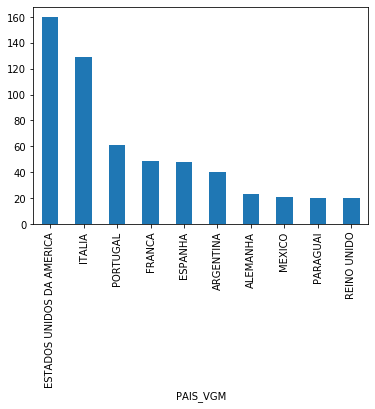

In [15]:
df.query('HISTO_VGM == 1 and PAIS_VGM != "BRASIL"').groupby('PAIS_VGM').size().sort_values(ascending=False).head(10).plot(kind='bar')


In [16]:
df.query('CARDIOPATI == 1')['CARDIOPATI'].value_counts()

1.0    95978
Name: CARDIOPATI, dtype: int64

In [17]:
df.query('DIABETES == 1')['DIABETES'].value_counts()

1.0    69082
Name: DIABETES, dtype: int64

In [18]:
df.query('OBESIDADE == 1')['OBESIDADE'].value_counts()

1.0    8900
Name: OBESIDADE, dtype: int64

In [19]:
df.query('NU_IDADE_N >= 60')['NU_IDADE_N'].count()

155079

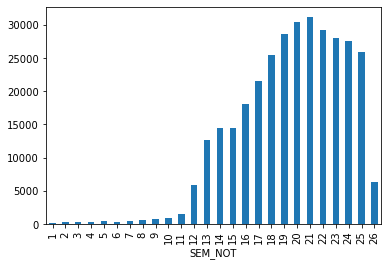

In [20]:
df.groupby('SEM_NOT').size().plot(kind='bar')

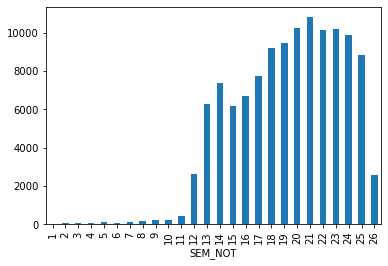

In [21]:
df.query('SG_UF_NOT == "SP"').groupby('SEM_NOT').size().plot(kind='bar')

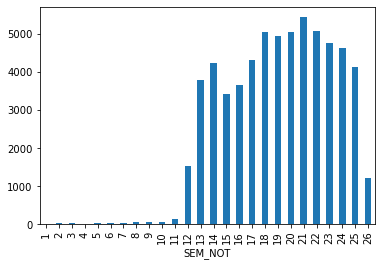

In [22]:
df.query('ID_MUNICIP == "SAO PAULO"').groupby('SEM_NOT').size().plot(kind='bar')

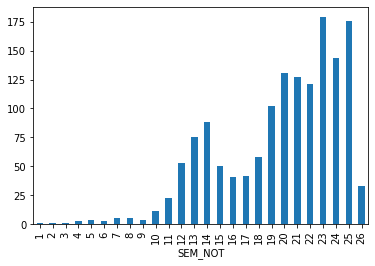

In [23]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"').groupby('SEM_NOT').size().plot(kind='bar')